# Task 1: Titanic Survival Prediction
**Problem Statement:** Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

## **Author : Moksh Jaiswal**.

In [136]:
# Importing a few basic data analysis librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing warnings
import warnings

warnings.filterwarnings("ignore")

In [169]:
# Reading the data
titanic = pd.read_csv(r'C:\Users\pc\CodSoft\Data Science Projects\Task1-Titanic Survival Prediction\tested.csv')

In [138]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Understanding the data

In [139]:
print("The size of the dataset is : ", titanic.size)
print("Total number of rows in the dataset is : ", titanic.shape[0])
print("Total number of columns in the dataset is : ", titanic.shape[1])

The size of the dataset is :  5016
Total number of rows in the dataset is :  418
Total number of columns in the dataset is :  12


In [140]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [141]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [142]:
titanic.duplicated().sum()

0

In [143]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [144]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [145]:
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [146]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

#### In a nutshell, in our dataset 
- We have **418** rows and **12** columns.
- Numeric Features: *PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare.*
- Categorical Features: *Name, Sex, Ticket, Cabin, Embarked.*
- 0 : *Not Survived*, 1 : *Survived*
- Q : *Queenstown*, S : *Southampton*, C : *Cherbourgh*

## Visualising the data

We will try to understand things like distribution of different data features, relation between various features and their impact on Survival etc. using various charts.

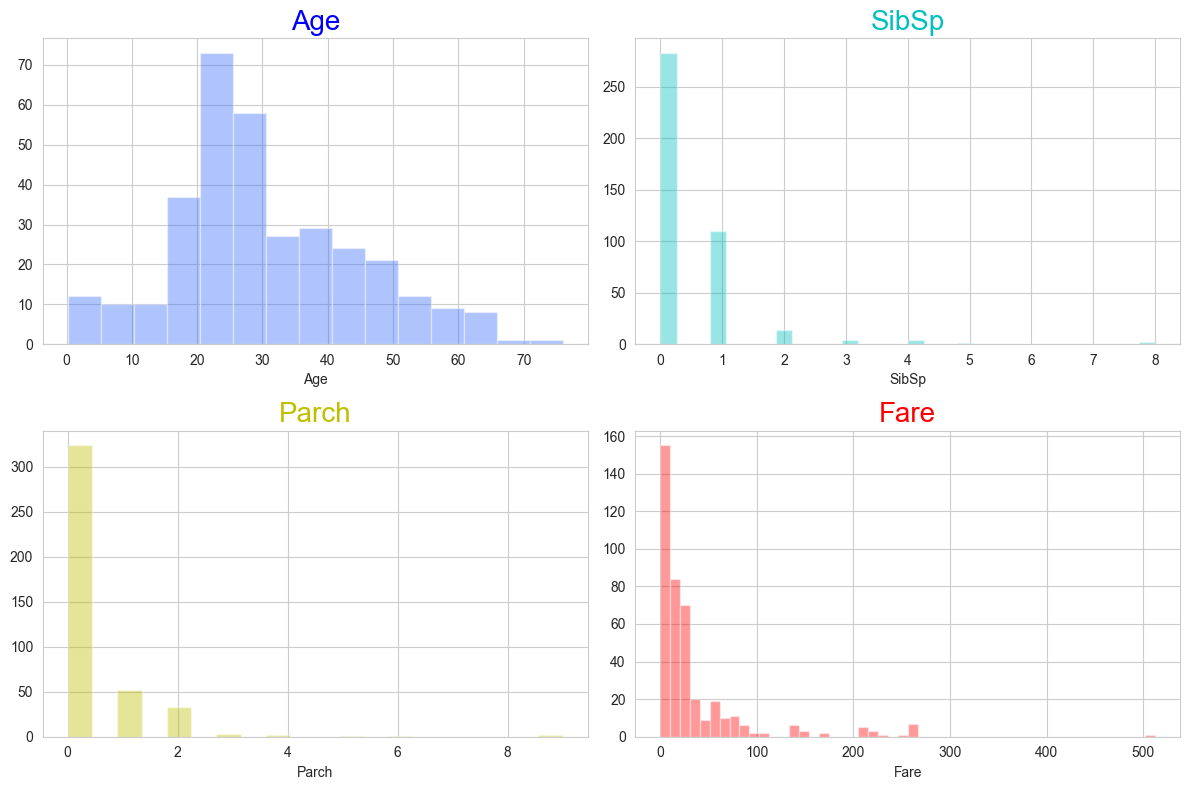

In [147]:
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.distplot(titanic['Age'], kde=False)
plt.title('Age', color='b', fontsize=20)

plt.subplot(2,2,2)
sns.distplot(titanic['SibSp'], kde=False, color='c')
plt.title('SibSp', color='c', fontsize=20)

plt.subplot(2,2,3)
sns.distplot(titanic['Parch'], kde=False, color='y')
plt.title('Parch', color='y', fontsize=20)

plt.subplot(2,2,4)
sns.distplot(titanic['Fare'], kde=False, color='r')
plt.title('Fare', color='r', fontsize=20)

plt.tight_layout()
plt.show()

We can observe the following things:
1. Most people were between the age of 20-30 while, a fair number of people were in the age group of 30-50.
2. Most number of people had no siblings. However, around 100 people had one sibling.
3. People with no spouses were the most amongst the passengers and only a few of them had a spouse.
4. The fare price of most of the tickets that were bought was between 0 to 50 pounds.

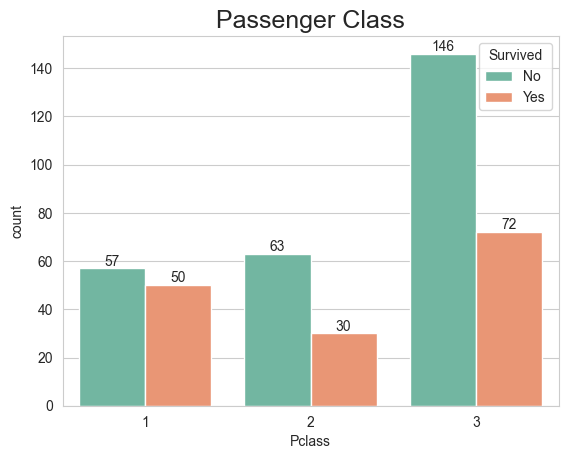

In [148]:
count_plot_pclass = sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set2')

for container in count_plot_pclass.containers:
    count_plot_pclass.bar_label(container)

plt.title('Passenger Class', fontsize=18)
plt.legend(title='Survived', loc='upper right', labels= ['No','Yes'])
plt.show()

Out of all the people belonging to the passenger class 2 and passenger class 3, only half of them survived . Whereas, only a few casualties (7 people) were noted of people belonging to the passenger class 1. 

This suggests that the passenger class 1 people were given the priority over the others.

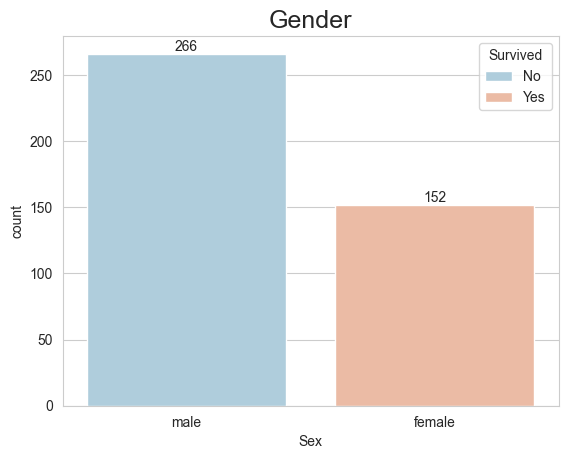

In [149]:
count_plot_gender = sns.countplot(x='Sex', hue='Survived', data=titanic, palette='RdBu_r')

for container in count_plot_gender.containers:
    count_plot_gender.bar_label(container)

plt.title('Gender', fontsize=18)
plt.legend(title='Survived', loc='upper right', labels= ['No','Yes'])
plt.show()

The above bar graph depicts that **none of the males survived** meanwhile, **all the females did**.

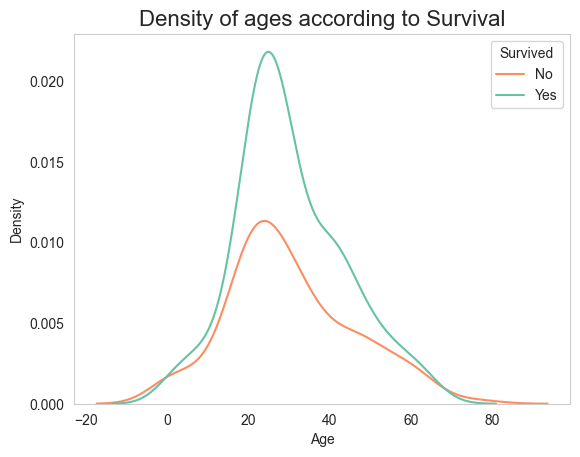

In [150]:
sns.kdeplot(data=titanic, x='Age', hue='Survived', palette='Set2')
plt.title("Density of ages according to Survival", fontsize=16)
plt.legend(title='Survived', loc='upper right', labels= ['No','Yes'])
plt.grid(False)
plt.show()

The survivers and the non-survivers both were mostly between the age of 20 to 40.

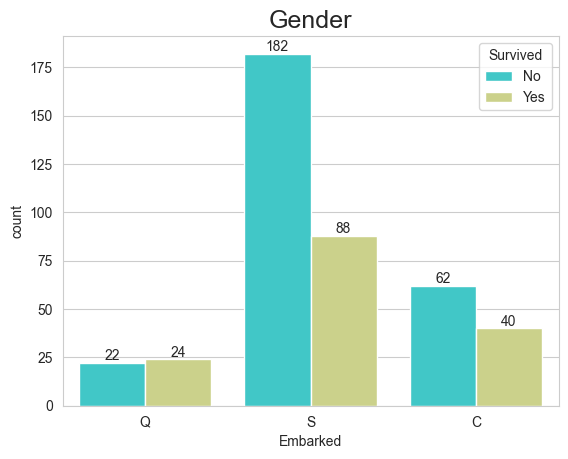

In [151]:
count_plot_embarked = sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='rainbow')

for container in count_plot_embarked.containers:
    count_plot_embarked.bar_label(container)

plt.title('Gender', fontsize=18)
plt.legend(title='Survived', loc='upper right', labels= ['No','Yes'])
plt.show()

1. **Queenstown** : Approximately all the passengers survived.
2. **Southampton** : More than half of the passengers were deceased(could not survive).
3. **Cherbourgh** : Most number or moderate or a fair number of people survived.

The reason behind the maximum number of survivers from Queenstown can perhaps be that they were mostly from the first class as first class passengers were given the priority over others. 

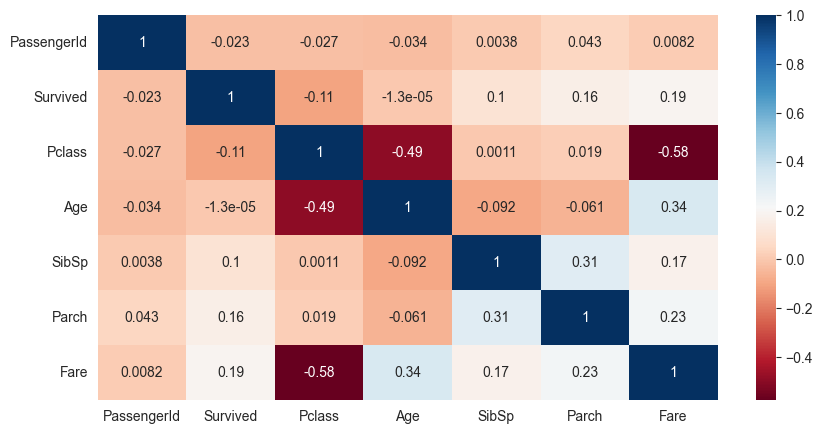

In [152]:
corr = titanic.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.show()

This heatmap suggests that, there is a **moderately negative** correlation between both **Passenger class and Age** and also between **Passenger class and Fare**.

Further, let's plot a boxplot to have a better understanding of the correlation between Passenger class & Age and Passenger class & Fare.

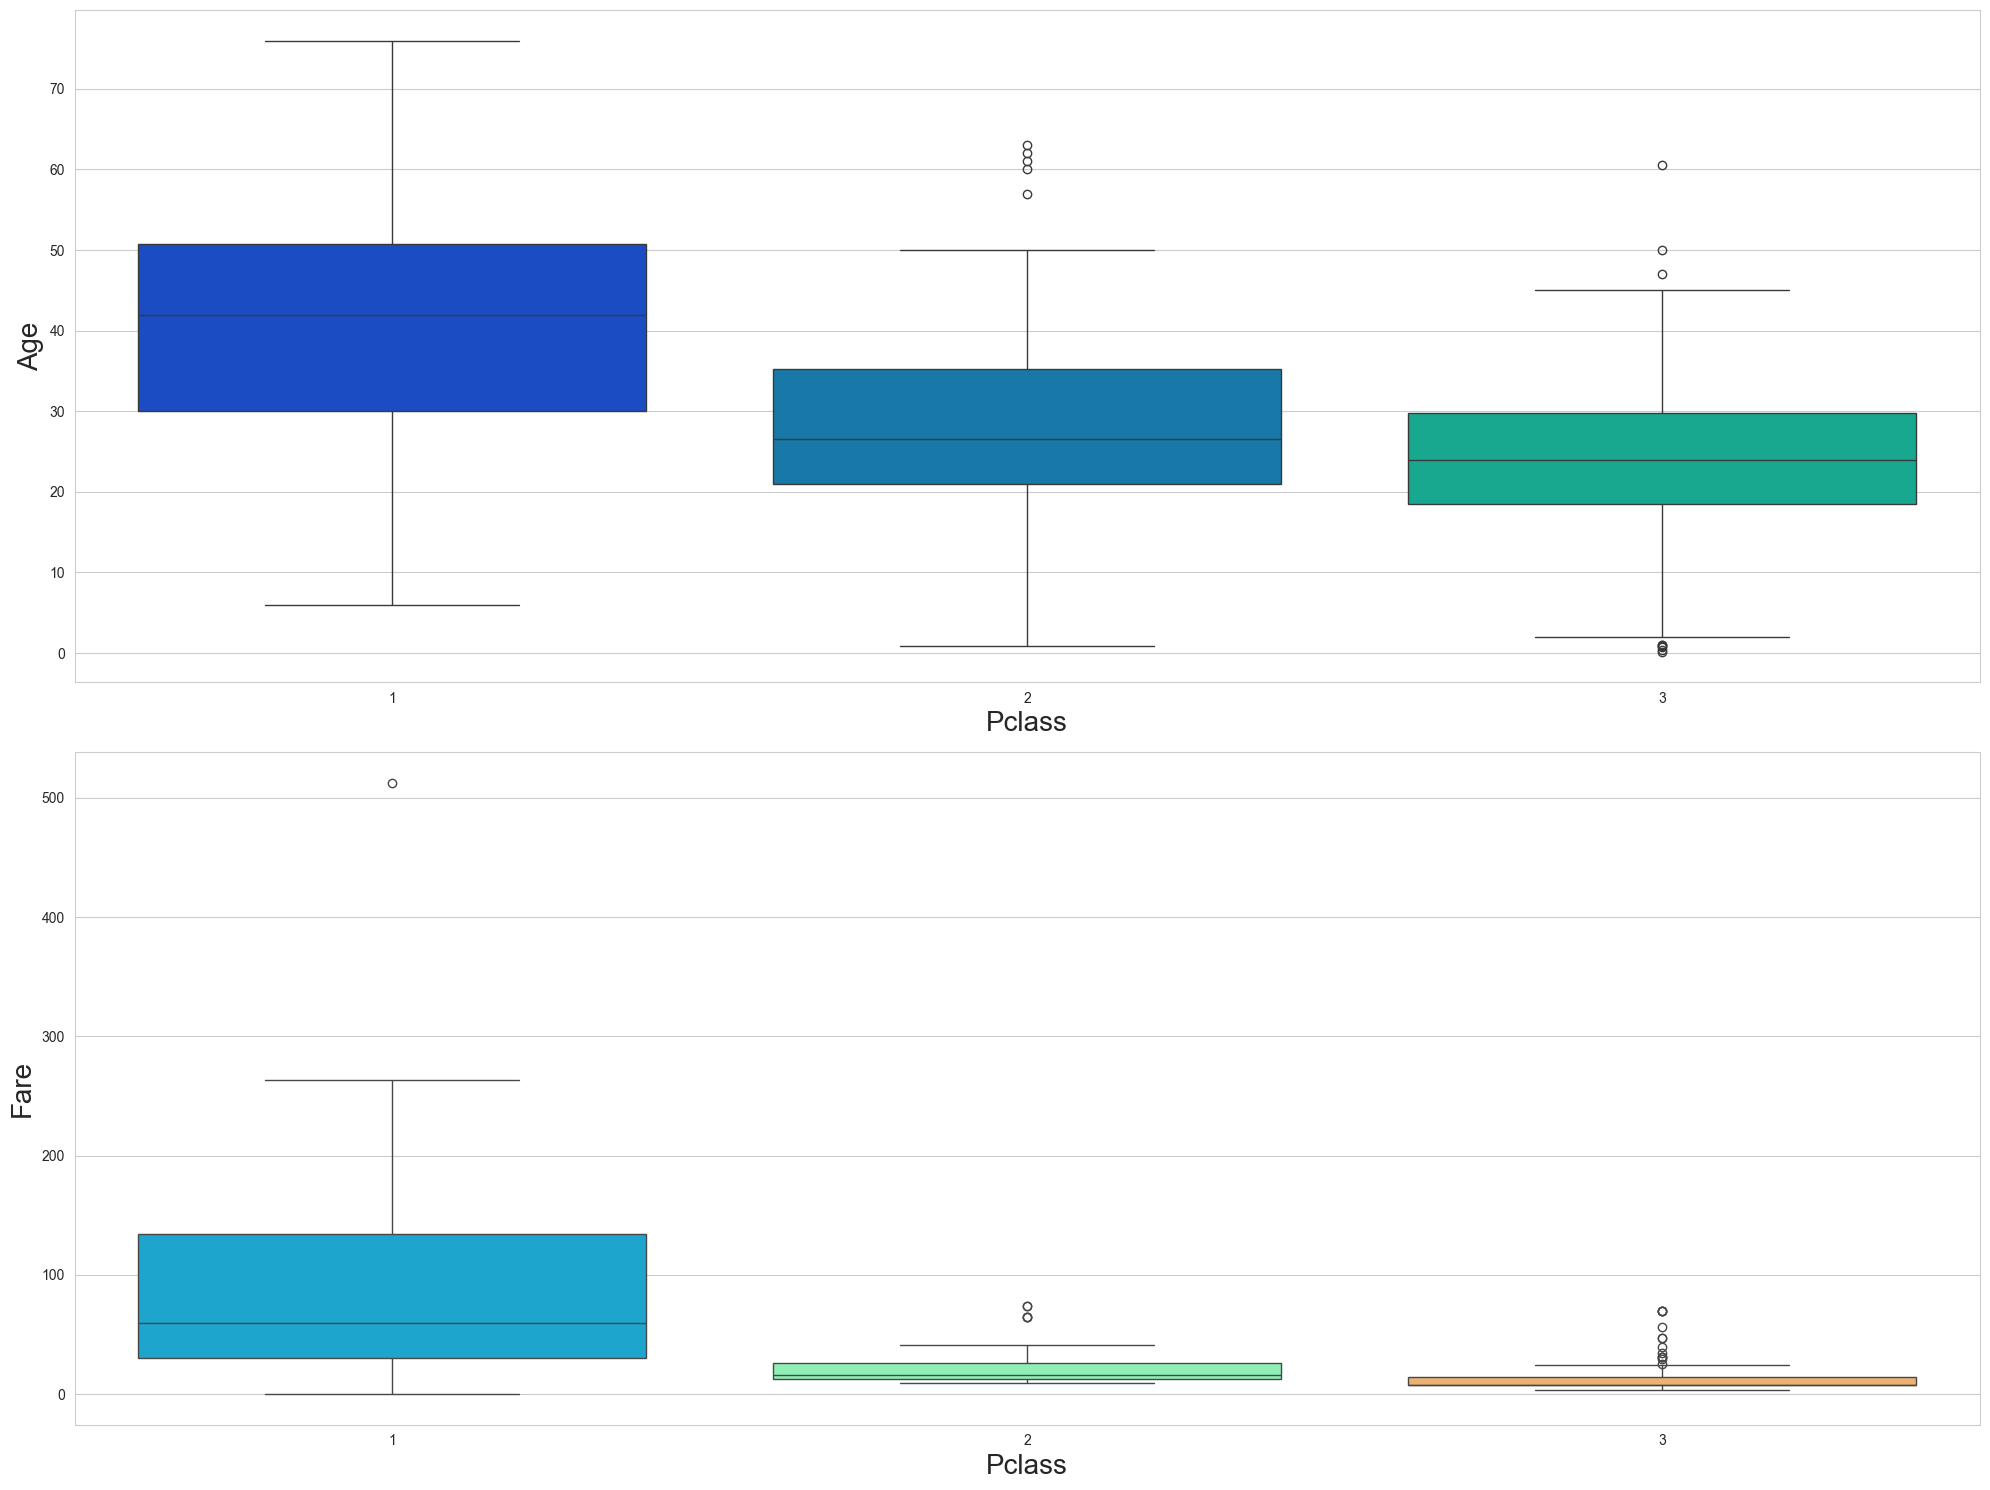

In [153]:
plt.figure(figsize=(20,15))

plt.subplot(2, 1, 1)
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')
plt.xlabel("Pclass", fontsize=20)
plt.ylabel("Age", fontsize=20)

plt.subplot(2, 1, 2)
sns.boxplot(x='Pclass', y='Fare', data=titanic, palette='rainbow')
plt.xlabel("Pclass", fontsize=20)
plt.ylabel("Fare", fontsize=20)

plt.tight_layout()
plt.show()

**1. Pclass and Age**:  We notice a few outliers in Passenger class 2 while, a lot of outliers in Passenger class 2.

**2. Pclass and Fare**:  We notice only one outlier in Passenger class 1, two outliers in Passenger class 2 and only a few outliers in Passenger class 3.

## Different ways to visualise missing values

Here, we will use different graphs and charts to visualise our data and identify the missing values

### DataFrame form

In [154]:
missing_data = titanic.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Value']

In [155]:
missing_data

,Column,Missing Value
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,86
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,1


### Heatmap

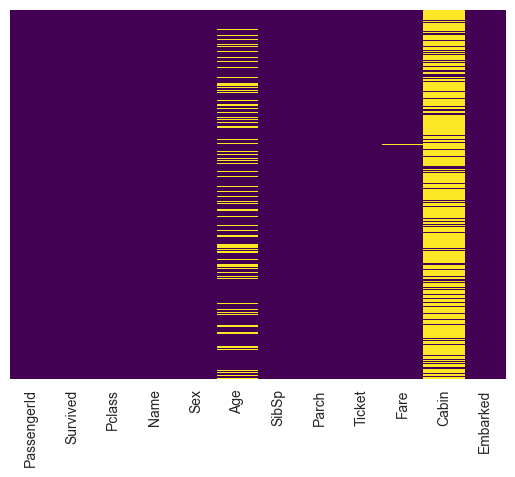

In [156]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Barchart

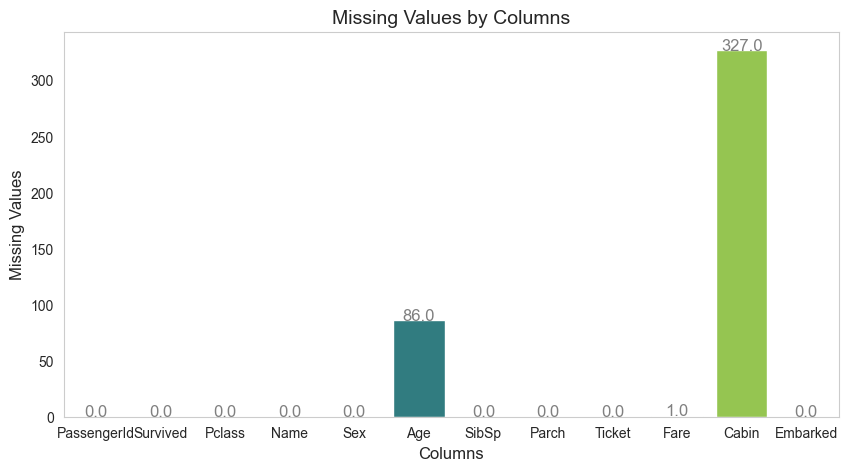

In [114]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Column', y = 'Missing Value', data = missing_data, palette = 'viridis')

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='grey')

plt.title('Missing Values by Columns', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.grid(False)
plt.show()

### Missingno Plots

 **Missingno** library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and is compatible with Pandas.

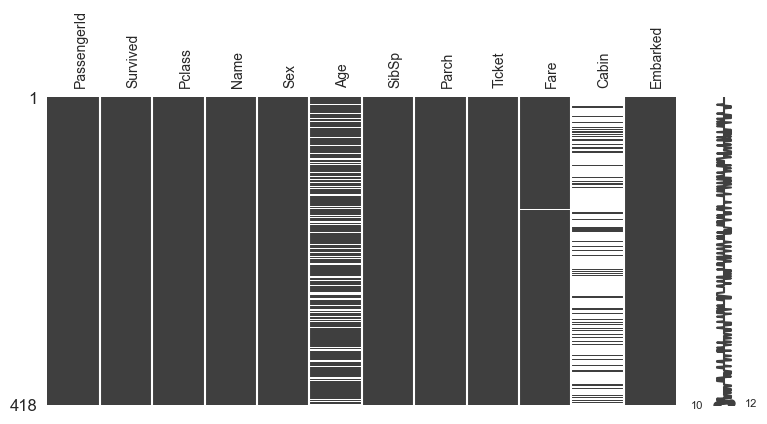

In [115]:
import missingno as msno
msno.matrix(titanic, figsize=(9,4), fontsize=10)
plt.xticks(rotation=90)
plt.show()

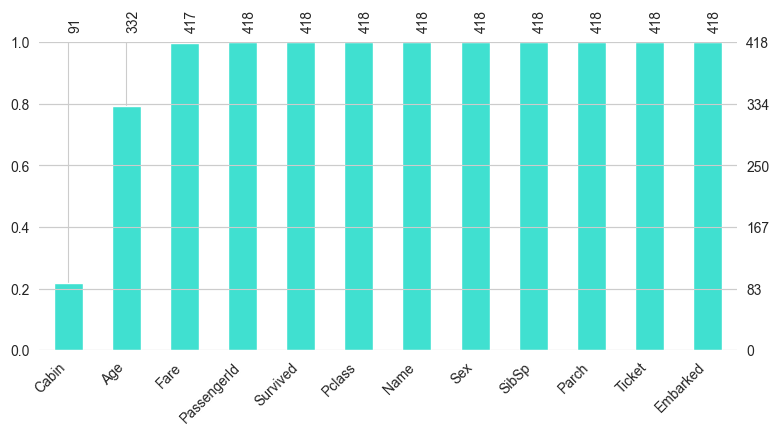

In [116]:
msno.bar(titanic, sort='ascending' ,color='turquoise',figsize=(9,4), fontsize=10)
plt.xticks(rotation=90)
plt.show()

There are missing values present in the features namely **'Cabin', 'Age'** and **'Fare'**. 

## Data Wrangling

Now, we will try to impute the missing values in our dataset.

In [157]:
avg_age = titanic.groupby(['Sex', 'Pclass'])['Age'].mean()

In [158]:
avg_age.to_frame()

Age
Sex    Pclass           
female 1       41.333333
       2       24.376552
       3       23.073400
male   1       40.520000
       2       30.940678
       3       24.525104

The below function is created to impute the null values present in the 'Age' column.

Here, we are imputing the null values using two features i.e. based on genderwise distribution among all the three passsenger classes.

In [170]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age): 

        if Sex == "female": 
            if Pclass == 1:
                return 41.0
            elif Pclass == 2:
                return 24.0           
            else:
                return 23.0

        else:
            if Pclass == 1:
                return 40.0

            elif Pclass == 2:
                return 31.0
            
            else:
                return 25.0

    else:
        return Age

In [171]:
titanic['Age'] = titanic[['Age', 'Pclass', 'Sex']].apply(impute_age, axis=1)

We see around 79% of data is missing in the Cabin column so we decide to simply drop it.

In [172]:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [173]:
titanic.drop('Cabin', axis=1, inplace=True)

In [174]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


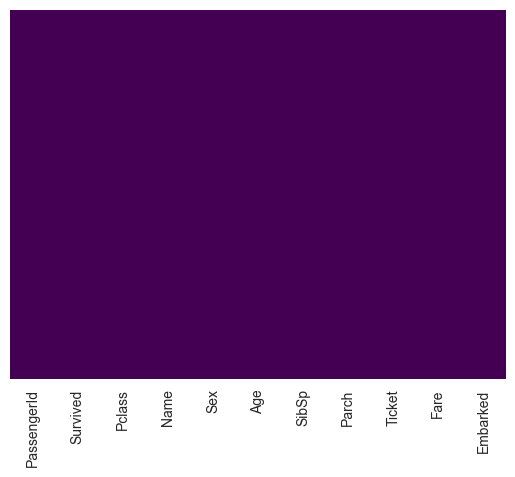

In [175]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')
plt.show()

In [176]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We can now observe that there are no more missing values present in our dataset.

## Converting Categorical Features
We need to convert the categorical features into dummy variables using pandas otherwise our machine learning algorithm won't be able to take directly those features as inputs.

In [177]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [178]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [179]:
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [180]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [181]:
titanic_df = pd.concat([titanic, sex, embarked], axis=1)

In [182]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


## Splitting Train and Test dataset.

In [183]:
X = titanic_df.iloc[:, :-1] # Independent features
y = titanic_df.iloc[:, -1]  # Dependent features

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Model Implementation

#### Logistic Regression
We know that in binary classification, Logistic Regression works better than most other machine learning algorithms.

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)), '\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)), '\n')
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred_lr)),'\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr),'\n')
print("Classification Report: \n", classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("\nLogistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')

Training set score: 0.77 

Test set score: 0.79 

Accuracy Score: 0.79 

Confusion Matrix: 
 [[18 23]
 [ 3 82]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        41
           1       0.78      0.96      0.86        85

    accuracy                           0.79       126
   macro avg       0.82      0.70      0.72       126
weighted avg       0.81      0.79      0.77       126


Logistic Regression Accuracy:  79.37%


#### Breakdown of the Classification Report


- **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It's also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
    - For class 0, the precision is 0.86, which means that 86% of the total instances predicted as class 0 are actually class 0.
    - For class 1, the precision is 0.78, which means that 78% of the total instances predicted as class 1 are actually class 1.

- **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to all observations in actual class. It's also called Sensitivity, Hit Rate, or True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
    - For class 0, the recall is 0.44, which means that the classifier correctly identified 44% of the total actual class 0 instances.
    - For class 1, the recall is 0.96, which means that the classifier correctly identified 96% of the total actual class 1 instances.

- **F1-Score**: F1 Score is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. It is a better measure than accuracy especially for uneven class distribution. 
    - For class 0, the F1-score is 0.58, which means that considering both precision and recall, the performance of the classifier for class 0 is 58%.
    - For class 1, the F1-score is 0.86, which means that considering both precision and recall, the performance of the classifier for class 1 is 86%.

- **Support**: Support is the number of actual occurrences of the class in the dataset. 
    - For class 0, there are 41 instances.
    - For class 1, there are 85 instances.

- **Accuracy**: Accuracy is the ratio of correctly predicted observations to the total observations. It is the most intuitive performance measure. Here, the accuracy is 0.79, which means the model is correct 79% of the time.

- **Macro Avg**: Macro-average will compute the metric independently for each class and then take the average treating all classes equally, whereas micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, macro-average is preferable if you suspect there might be class imbalance.

- **Weighted Avg**: This is the average of metrics but when calculated, it takes into account the number of instances in each class. It gives more weight to the metrics of the clasave any other questions.

---
## In conclusion
Based on the classification report, here are some conclusions we can draw:

1. **Model Performance**: The model has an overall accuracy of 0.79, which means it correctly predicts the class 79% of the time. This is a decent score, but there might be room for improvement.

2. **Class 0 Performance**: For class 0, the precision is high (0.86), but the recall is quite low (0.44). This means that while the model is good at predicting class 0 when it is indeed class 0 (high precision), it's not so good at identifying class 0 instances in general (low recall). The F1-score for class 0 is 0.58, indicating that the model's performance for class 0 is less than optimal.

3. **Class 1 Performance**: For class 1, both the precision (0.78) and recall (0.96) are relatively high, leading to a high F1-score (0.86). This suggests that the model performs well for class 1.

4. **Class Imbalance**: The support values show that there are twice as many instances of class 1 (85) as there are of class 0 (41). This class imbalance might be affecting the model's performance, particularly for class 0.

5. **Macro Avg vs Weighted Avg**: The macro average F1-score is 0.72, while the weighted average F1-score is 0.77. The difference between these two scores suggests that the model's performance is better on the class with more instances (class 1).

In conclusion, while the model performs well overall and particularly well for class 1, it struggles with class 0. This could be due to the class imbalance in the data. You might want to consider techniques for handling class imbalance to improve the model's performance for class 0.

We can further do the Model Deployment using softwares like AWS Sagemaker, Azure etc.

## Model Improvement Tips
Now, there are a few things that can be done to improve the model accuracy such as,

1. **Use a larger dataset**: The more data you have, the better your model will be able to learn from it and generalize to unseen data.

2. **Try different algorithms**: By trying different algorithms, you can identify which ones work best for your data.

3. **Tune hyperparameters**: Hyperparameters are the parameters that are not learned from the data. They are set prior to the commencement of the learning process. Tuning them can lead to better model performance.

4. **Treat outlier values**: Proper handling of outlier values can improve the model's performance.

5. **Feature engineering**: This involves creating new features from existing ones which might help improve the model's performance.

6. **Feature selection**: It is the process of choosing which features to include in a machine learning model.

7. **Use multiple algorithms or ensemble methods**: Combining the predictions of multiple models can often yield better results.

8. **Cross-validation**: It is a technique where the data is split into several parts, and the model is trained on some parts and tested on others. This helps in understanding how well the model is likely to perform on unseen data.

Remember, there's no one-size-fits-all strategy for improving machine learning models. It all comes down to the business problem, the available data, and the type of algorithm.

This is the total scope of the project but we can implement more classification algorithms for the sake of learning and understanding.